## **ECON 470 Hwk2-3**

**Author:** Ilse Novis 

**Date:** 3/19/2025  

[GitHub Repository](https://github.com/ilsenovis18/ECON470HW3)


\newpage

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# File path
data_path = "/Users/ilsenovis/Documents/GitHub/ECON470HW3/data/output/TaxBurden_Data.csv"

# Load data
df = pd.read_csv(data_path)

# **Summarize the Data**

\newpage

### <span style="color:blue">**Question 1:** Present a bar graph showing the proportion of states with a change in their cigarette tax in each year from 1970 to 1985.</span>

In [4]:
# Create seperate copy for this question
df_q1 = df.copy()

# Filter for years 1970-1985
df_q1 = df_q1[(df_q1['Year'] >= 1970) & (df_q1['Year'] <=1985)]

# Sort data to compute changes
df_q1 = df_q1.sort_values(by=['state', 'Year'])

# Compute tax changes by state per year
df_q1['tax_change'] = df_q1.groupby('state')['tax_state'].diff().ne(0)

# Calculate the proportion of states with a tax change each year
tax_change_proportion = df_q1.groupby('Year')['tax_change'].mean()

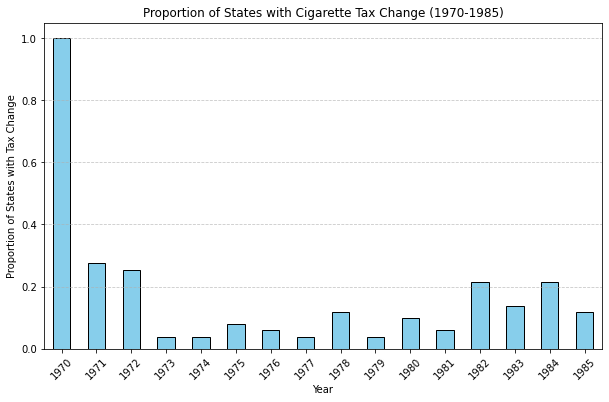

In [5]:
# Plot bar graph
plt.figure(figsize=(10, 6))
tax_change_proportion.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Proportion of States with Tax Change')
plt.title('Proportion of States with Cigarette Tax Change (1970-1985)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

\newpage

### <span style="color:blue">**Question 2:** Plot on a single graph the average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1970 to 2018.</span>

In [6]:
# Create seperate copy for this question
df_q2 = df.copy()

# Filter for  years 1970-2018
df_q2 = df_q2[(df_q2['Year'] >=1970) & (df_q2['Year'] <=2018)]

# Compute yearly averages for tax and price (already adjusted for inflation)
avg_tax_per_year = df_q2.groupby('Year')['tax_2012'].mean()
avg_price_per_year = df_q2.groupby('Year')['price_cpi'].mean()

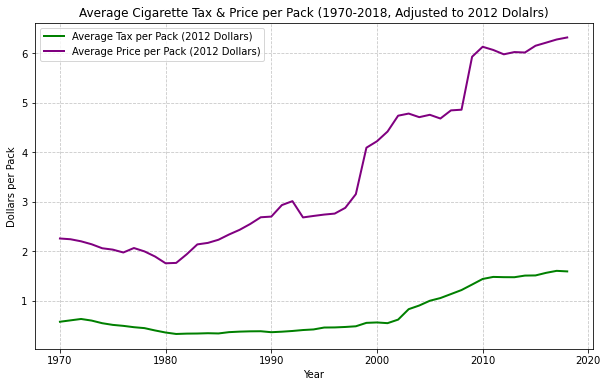

In [7]:
# Plot both on the same graph
plt.figure(figsize=(10, 6))
plt.plot(avg_tax_per_year, label='Average Tax per Pack (2012 Dollars)', color='green', linewidth=2)
plt.plot(avg_price_per_year, label='Average Price per Pack (2012 Dollars)', color='purple',  linewidth=2)

# Graph formatting
plt.xlabel('Year')
plt.ylabel('Dollars per Pack')
plt.title('Average Cigarette Tax & Price per Pack (1970-2018, Adjusted to 2012 Dolalrs)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

\newpage

### <span style="color:blue"> **Question 3:** Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018.</span>

In [8]:
# Create seperate copy for this question
df_q3 = df.copy()

# Filter for years 1970-2018
df_q3 = df_q3[(df_q3['Year'] >= 1970) & (df_q3['Year'] <= 2018)]

# Compute the price difference between 1970 and 2018
price_change = df_q3.groupby('state')['price_cpi'].agg(['first', 'last'])
price_change['price_increase'] = price_change['last'] - price_change['first']

# Identify the 5 states with the highest price increase
top_5_states = price_change.nlargest(5, 'price_increase').index.tolist()
#print("Top 5 states with highest pring increase:", top_5_states)

# Filter dataset for these states only
df_q3 = df_q3[df_q3['state'].isin(top_5_states)]

# Compute the average packs sold per capita for these states each year
avg_sales_per_year = df_q3.groupby(['Year', 'state'])['sales_per_capita'].mean().unstack()

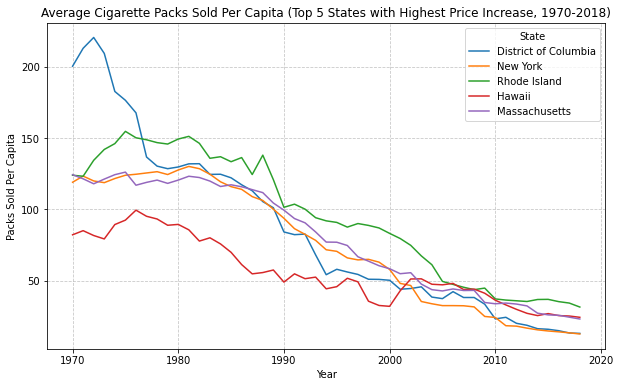

In [9]:
# Plot the trend for each of the top 5 states
plt.figure(figsize=(10, 6))
for state in top_5_states:
    plt.plot(avg_sales_per_year.index, avg_sales_per_year[state], label=state)

# Format Graph
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.title('Average Cigarette Packs Sold Per Capita (Top 5 States with Highest Price Increase, 1970-2018)')
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

\newpage

### <span style="color:blue"> **Question 4:** Identify the 5 states with the lowest increases in cigarette prices over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018. </span>

In [10]:
# Create seperate copy for this question
df_q4 = df.copy()

# Filter for years 1970-2018
df_q4 = df_q4[(df_q4['Year'] >= 1970) & (df_q4['Year'] <= 2018)]

# Compute the price difference between 1970 and 2018
price_change = df_q4.groupby('state')['price_cpi'].agg(['first', 'last'])
price_change['price_increase'] = price_change['last'] - price_change['first']

# Identify the 5 states with the lowest price increase
bottom_5_states = price_change.nsmallest(5, 'price_increase').index.tolist()
#print("Bottom 5 states with lowest price increase:", bottom_5_states)

# Filter the dataset for these states only
df_q4 = df_q4[df_q4['state'].isin(bottom_5_states)]

# Compute the average packs sold per capita for these states each year
avg_sales_per_year = df_q4.groupby(['Year', 'state'])['sales_per_capita'].mean().unstack()

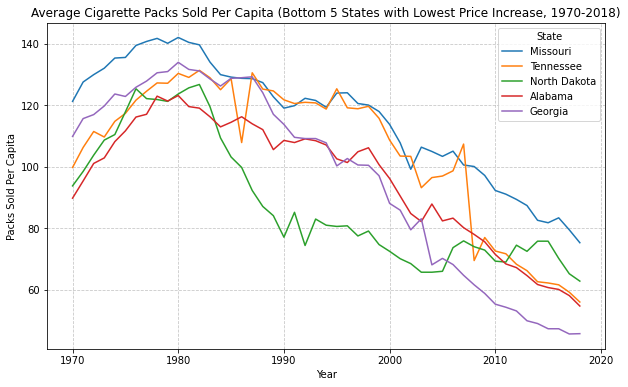

In [11]:
# Plot the trend for each of the bottom 5 states
plt.figure(figsize=(10, 6))
for state in bottom_5_states:
    plt.plot(avg_sales_per_year.index, avg_sales_per_year[state], label=state)

# Graph formatting
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.title('Average Cigarette Packs Sold Per Capita (Bottom 5 States with Lowest Price Increase, 1970-2018)')
plt.legend(title="State")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

\newpage

### <span style="color:blue"> **Question 5:** Compare the trends in sales from the 5 states with the highest price increases to those with the lowest price increases. </span>

In [12]:
# Create seperate copy for this question
df_q5 = df.copy()

# Filter for years 1970-2018
df_q5 = df_q5[(df_q5['Year'] >= 1970) & (df_q5['Year'] <= 2018)]

# Compute the first and last cigarette price for each state
price_change = df_q5.groupby("state")["price_cpi"].agg(["first", "last"])
price_change["price_increase"] = price_change["last"] - price_change["first"]

# Identify the 5 states with the highest price increase
top_5_states = price_change.nlargest(5, "price_increase").index.tolist()
#print("Top 5 states with highest price increase:", top_5_states)

# Identify the 5 states with the lowest price increase
bottom_5_states = price_change.nsmallest(5, "price_increase").index.tolist()
#print("Bottom 5 states with lowest price increase:", bottom_5_states)

# Filter the dataset for these states only
df_q5_top = df_q5[df_q5["state"].isin(top_5_states)]
df_q5_bottom = df_q5[df_q5["state"].isin(bottom_5_states)]

# Compute the average packs sold per capita for each group
avg_sales_top = df_q5_top.groupby('Year')['sales_per_capita'].mean()
avg_sales_bottom = df_q5_bottom.groupby('Year')['sales_per_capita'].mean()

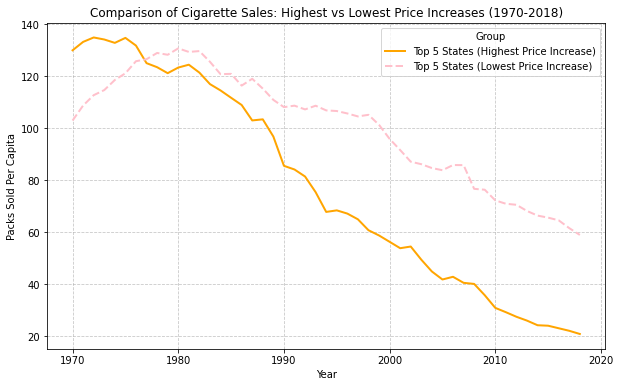

In [13]:
# Plot the trends for both groups
plt.figure(figsize=(10, 6))
plt.plot(avg_sales_top.index, avg_sales_top, label='Top 5 States (Highest Price Increase)', 
         color='orange', linewidth=2)
plt.plot(avg_sales_bottom.index, avg_sales_bottom, label='Top 5 States (Lowest Price Increase)', 
         color='pink', linestyle='--', linewidth=2)  # Dashed line for bottom 5 states

# Format Graph
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.title('Comparison of Cigarette Sales: Highest vs Lowest Price Increases (1970-2018)')
plt.legend(title="Group")  # Adds a legend title
plt.grid(True, linestyle='--', alpha=0.7)  # Adds a grid for better readability

# Show plot
plt.show()

\newpage

# **Estimate ATEs**

\newpage

### <span style="color:blue">**Question 6:** Focusing only on the time period from 1970 to 1990, regress log sales on log prices to estimate the price elasticity of demand over that period. Interpret your results. </span>

In [14]:
# Create seperate copy for this question
df_q6 = df.copy()

# Filter for years 1970-1990
df_q6 = df_q6[(df_q6['Year'] >= 1970) & (df_q6['Year'] <= 1990)]

# Take the natural log of sales_per_capita and price_cpi
df_q6['log_sales'] = np.log(df_q6['sales_per_capita'])
df_q6['log_price'] = np.log(df_q6['price_cpi'])

# Drop any rows with missing values
df_q6 = df_q6.dropna(subset=['log_sales', 'log_price'])

# Define dependent (Y) and independent (X) variables
X = sm.add_constant(df_q6['log_price'])
Y = df_q6['log_sales']

# Run and print OLS regression
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     445.1
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           6.98e-83
Time:                        17:25:31   Log-Likelihood:                 263.40
No. Observations:                1071   AIC:                            -522.8
Df Residuals:                    1069   BIC:                            -512.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4288      0.030    182.065      0.0

In [15]:
# Extract and interpret price elasticity of demand
elasticity = model.params['log_price']
print(f"Estimated Price Elasticity of Demand: {elasticity:.3f}")

# Interpretation
if elasticity < 0:
    print(f"The estimated price elasticity of demand is {elasticity:.3f}, meaning that a 1% increase in price is associated with a {-elasticity:.1f}% decrease in cigarette consumption.")
else:
    print("Unexpected result: The price elasticity estimate is positive, which is unlikely for a demand curve.")

Estimated Price Elasticity of Demand: -0.809
The estimated price elasticity of demand is -0.809, meaning that a 1% increase in price is associated with a 0.8% decrease in cigarette consumption.


\newpage

### <span style="color:blue"> **Question 7**: Regress log sales on log prices using the total (federal and state) cigarette tax (in dollars) as an instrument for log prices. Interpret your results and compare your estimates to those without an instrument. Are they different? If so, why? </span>

#### **Question 7.1:**

In [16]:
# Create seperate copy for this question
df_q7 = df.copy()

# Filter for years 1970-1990
df_q7 = df_q7[(df_q7['Year'] >= 1970) & (df_q7['Year'] <= 1990)]

# Take the natural log of sales, price, and tax
df_q7['log_sales'] = np.log(df_q7['sales_per_capita'])
df_q7['log_price'] = np.log(df_q7['price_cpi'])
df_q7['log_tax'] = np.log(df_q7['tax_dollar'])

# Drop any rows with  missing values
df_q7 = df_q7.dropna(subset=['log_sales', 'log_price', 'log_tax'])

# ------------ First-Stage Regresson: Predict log(price) using log(tax) ------------
X_first_stage = sm.add_constant(df_q7['log_tax']) #IV
Y_first_stage = df_q7['log_price'] # Endogenous variable

first_stage_model = sm.OLS(Y_first_stage, X_first_stage).fit()
df_q7['log_price_hat'] = first_stage_model.predict(X_first_stage)

print('First-Stage Regression Results:')
print(first_stage_model.summary())

First-Stage Regression Results:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1725.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          2.80e-225
Time:                        17:25:32   Log-Likelihood:                 1020.7
No. Observations:                1071   AIC:                            -2037.
Df Residuals:                    1069   BIC:                            -2027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.235

#### **Question 7.2:**

In [17]:
# ------------ Second-Stage Regresson: Use predicited log(price) ------------
X_second_stage = sm.add_constant(df_q7['log_price_hat']) # use predicted price
Y_second_stage = df_q7['log_sales'] # dependent variable

second_stage_model = sm.OLS(Y_second_stage, X_second_stage).fit()

print("\nSecond-Stage (IV) Regression Results:")
print(second_stage_model.summary())

# Extract estimated price elasticity
elasticity_iv = second_stage_model.params["log_price_hat"]
print(f"\nIV-Estimated Price Elasticity of Demand: {elasticity_iv:.3f}")

# ---- Compare IV Estimates to OLS Estimates ---- #
# Re-run the simple OLS regression (from Q6) for direct comparison
X_ols = sm.add_constant(df_q7['log_price'])
ols_model = sm.OLS(Y_second_stage, X_ols).fit()
elasticity_ols = ols_model.params['log_price']

print(f"\nOLS-Estimated Price Elasticity: {elasticity_ols:.3f}")
print(f"Difference between OLS and IV Estimates: {elasticity_ols - elasticity_iv:.3f}")



Second-Stage (IV) Regression Results:
                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.56e-64
Time:                        17:25:33   Log-Likelihood:                 221.17
No. Observations:                1071   AIC:                            -438.3
Df Residuals:                    1069   BIC:                            -428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

#### **Question 7:** Interpretation

In [18]:
# Interpretation
if abs(elasticity_iv) > abs(elasticity_ols):
    print("\nThe IV estimate is more negative (elastic), suggesting OLS underestimated price elasticity due to endogeneity.")
elif abs(elasticity_iv) < abs(elasticity_ols):
     print("\nThe IV estimate is closer to zero, suggesting that OLS overestimated price elasticity.")
else:
    print("\nNo significant difference between OLS and IV estimates, suggesting endogeneity may not be a major issue.")


The IV estimate is more negative (elastic), suggesting OLS underestimated price elasticity due to endogeneity.


\newpage

### <span style="color:blue">**Question 8:** Show the first stage and reduced-form results from the instrument. </span>

#### **Question 8.1:** First Stage Form

In [19]:
# Question 8 ----------------------------------------------------------------------------------------------------------------------------------------
# Create seperate copy for this question
df_q8 = df.copy()

# Filter for years 1970-1990
df_q8 = df_q8[(df_q8['Year'] >= 1970) & (df_q8['Year'] <= 1990)]

# Take natural log of sales, price, and tax
df_q8["log_sales"] = np.log(df_q8["sales_per_capita"])
df_q8["log_price"] = np.log(df_q8["price_cpi"])
df_q8["log_tax"] = np.log(df_q8["tax_dollar"])

# Drop any rows with missing values
df_q8 = df_q8.dropna(subset=["log_sales", "log_price", "log_tax"])

# ------------ First-Stage Regresson: Predict log(price) using log(tax) ------------
X_first_stage = sm.add_constant(df_q8['log_tax']) # instrument
Y_first_stage = df_q8['log_price'] #endogenous variable

first_stage_model = sm.OLS(Y_first_stage, X_first_stage).fit()

print("\n=== First-Stage Regression: Log(Price) ~ Log(Tax) ===")
print(first_stage_model.summary())


=== First-Stage Regression: Log(Price) ~ Log(Tax) ===
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1725.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          2.80e-225
Time:                        17:25:35   Log-Likelihood:                 1020.7
No. Observations:                1071   AIC:                            -2037.
Df Residuals:                    1069   BIC:                            -2027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

\newpage

#### **Question 8.2:** Reduced Form Regression

In [20]:
# ---- Reduced-Form Regression: Directly regress log(sales) on log(tax) ---- #
X_reduced_form = sm.add_constant(df_q8['log_tax']) #tax is regressor
Y_reduced_form = df_q8['log_sales'] #dependent variable

reduced_form_model = sm.OLS(Y_reduced_form, X_reduced_form).fit()
print("\n=== Reduced-Form Regression: Log(Sales) ~ Log(Tax) ===")
print(reduced_form_model.summary())


=== Reduced-Form Regression: Log(Sales) ~ Log(Tax) ===
                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.56e-64
Time:                        17:25:36   Log-Likelihood:                 221.17
No. Observations:                1071   AIC:                            -438.3
Df Residuals:                    1069   BIC:                            -428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

\newpage

### <span style="color:blue">**Question 9:** Repeat questions 1-3 focusing on the period from 1991 to 2015. </span>

#### **Question 9.1:** Bar graph showing the proportion of states with a change in their cigarette tax

In [21]:
# Create seperate copy for this question
df_q9 = df.copy()

# Filter for years 1991-2015
df_q9 = df_q9[(df_q9['Year'] >= 1991) & (df_q9['Year'] <= 2015)]

# ---- Question 1: Proportion of States with a Tax Change (1991-2015) ---- #
df_q9_q1 = df_q9.copy()
df_q9_q1 = df_q9_q1.sort_values(by=['state', 'Year'])
df_q9_q1['tax_change'] = df_q9_q1.groupby('state')['tax_state'].diff().ne(0)
tax_change_proportion_q9 = df_q9_q1.groupby('Year')['tax_change'].mean()

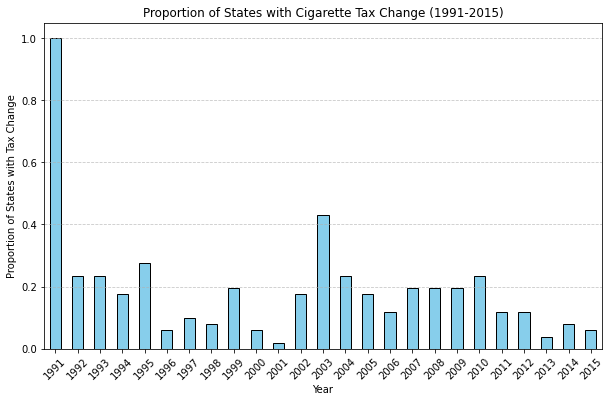

In [22]:
# Plot bar graph
plt.figure(figsize=(10, 6))
tax_change_proportion_q9.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Proportion of States with Tax Change')
plt.title('Proportion of States with Cigarette Tax Change (1991-2015)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

\newpage

#### **Question 9.2:** Average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1991 to 2015

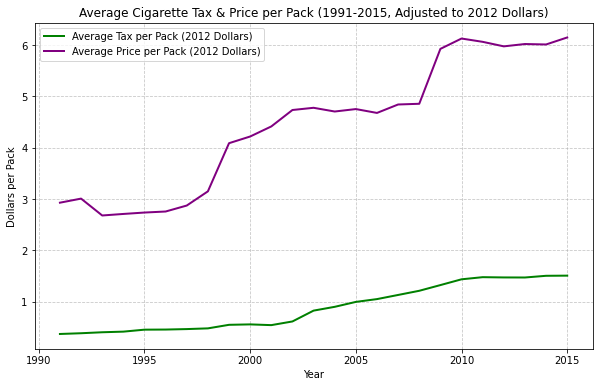

In [23]:
# ---- Question 2: Average Tax & Price Per Pack (1991-2015) ---- #
df_q9_q2 = df_q9.copy()

# Compute yearly averages for tax and price (already adjusted for 2012 dollars in data-code)
avg_tax_per_year_q9 = df_q9_q2.groupby('Year')['tax_2012'].mean()
avg_price_per_year_q9 = df_q9_q2.groupby('Year')['price_cpi'].mean()

# Plot both on the same graph
plt.figure(figsize=(10, 6))
plt.plot(avg_tax_per_year_q9, label='Average Tax per Pack (2012 Dollars)', color='green', linewidth=2)
plt.plot(avg_price_per_year_q9, label='Average Price per Pack (2012 Dollars)', color='purple', linewidth=2)

# Graph formatting
plt.xlabel('Year')
plt.ylabel('Dollars per Pack')
plt.title('Average Cigarette Tax & Price per Pack (1991-2015, Adjusted to 2012 Dollars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

\newpage

#### **Question 9.3:** Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period. Plot the average number of packs sold per capita for those states from 1991 to 2015

Top 5 states with highest price increase (1991-2015): ['New York', 'Massachusetts', 'Alaska', 'Hawaii', 'Rhode Island']


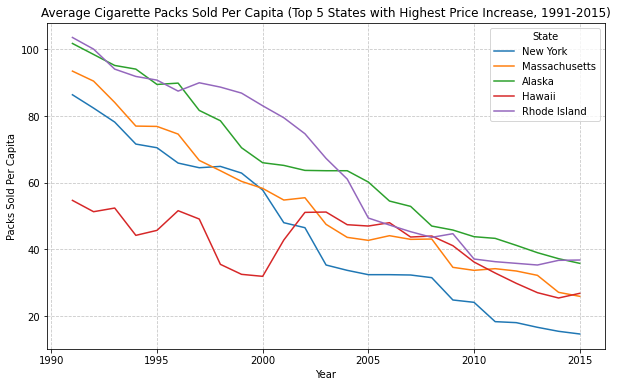

In [24]:
# ---- Question 3: Top 5 States with Highest Price Increase (1991-2015) ---- #
df_q9_q3 = df_q9.copy()

# Compute the first and last cigarette price for each state
price_change_q9 = df_q9_q3.groupby("state")["price_cpi"].agg(["first", "last"])
price_change_q9["price_increase"] = price_change_q9["last"] - price_change_q9["first"]

# Identify the 5 states with the highest price increase
top_5_states_q9 = price_change_q9.nlargest(5, "price_increase").index.tolist()
print("Top 5 states with highest price increase (1991-2015):", top_5_states_q9)

# Filter the dataset for these states only
df_q9_q3 = df_q9_q3[df_q9_q3["state"].isin(top_5_states_q9)]

# Compute the average packs sold per capita for these states each year
avg_sales_per_year_q9 = df_q9_q3.groupby(["Year", "state"])["sales_per_capita"].mean().unstack()

# Plot the trend for each of the top 5 states
plt.figure(figsize=(10, 6))
for state in top_5_states_q9:
    plt.plot(avg_sales_per_year_q9.index, avg_sales_per_year_q9[state], label=state)

# Graph formatting
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.title('Average Cigarette Packs Sold Per Capita (Top 5 States with Highest Price Increase, 1991-2015)')
plt.legend(title="State")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

\newpage

### <span style="color:blue"> **Question 10:** Compare your elasticity estimates from 1970-1990 versus those from 1991-2015. Are they different? If so, why?</span>

In [25]:
# Function to estimate price elasticity of demand for a given period
def estimate_elasticity(df, start_year, end_year):
    df_period = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].copy()

    df_period["log_sales"] = np.log(df_period["sales_per_capita"])
    df_period["log_price"] = np.log(df_period["price_cpi"])

    df_period = df_period.dropna(subset=["log_sales", "log_price"])

    X = sm.add_constant(df_period["log_price"])
    Y = df_period["log_sales"]

    model = sm.OLS(Y, X).fit()

    elasticity = model.params["log_price"]
    print(f"\n=== Price Elasticity Estimate for {start_year}-{end_year} ===")
    print(model.summary())
    print(f"Estimated Price Elasticity: {elasticity:.3f}")

    return elasticity

# Estimate elasticity for 1970-1990
elasticity_1970_1990 = estimate_elasticity(df, 1970, 1990)

# Estimate elasticity for 1991-2015
elasticity_1991_2015 = estimate_elasticity(df, 1991, 2015)

# Compare the results
print("\n=== Elasticity Comparison ===")
print(f"Elasticity (1970-1990): {elasticity_1970_1990:.3f}")
print(f"Elasticity (1991-2015): {elasticity_1991_2015:.3f}")
print(f"Difference: {elasticity_1970_1990 - elasticity_1991_2015:.3f}")


=== Price Elasticity Estimate for 1970-1990 ===
                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     445.1
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           6.98e-83
Time:                        17:25:43   Log-Likelihood:                 263.40
No. Observations:                1071   AIC:                            -522.8
Df Residuals:                    1069   BIC:                            -512.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [26]:
# Interpretation
if abs(elasticity_1991_2015) > abs(elasticity_1970_1990):
    print("\nDemand became more elastic (greater sensitivity to price changes) in 1991-2015.")
elif abs(elasticity_1991_2015) < abs(elasticity_1970_1990):
    print("\nDemand became less elastic (lower sensitivity to price changes) in 1991-2015.")
else:
    print("\nNo significant change in elasticity between the two periods.")


Demand became more elastic (greater sensitivity to price changes) in 1991-2015.


don't hardcode CPI

graphs:
- have label in graph not off to side in legend 
- go by every 5 years on x axis
- add legend to question 5, make one line dashed
`
tables:
- qmd file maybe? 
- python fixedeffects table
pyfixes import pyfixest as pf
    same syntax as fixest but for python
    
